In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [6]:
hdul = fits.open('tic0002236015.fits')
times = hdul[1].data['times']
fluxes = hdul[1].data['fluxes']
ferrs = hdul[1].data['ferrs']

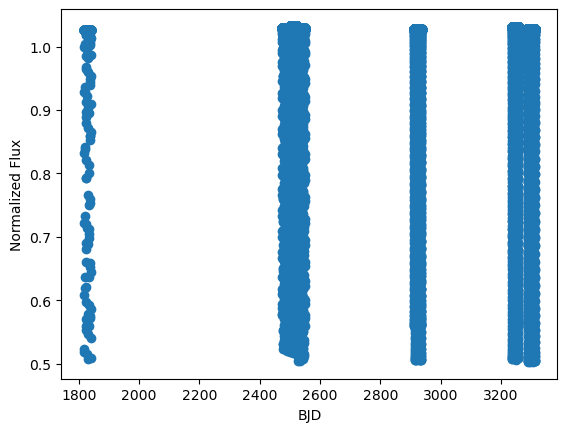

In [77]:
plt.scatter(times,fluxes)
plt.xlabel('BJD')
plt.ylabel('Normalized Flux')
plt.show()

In [20]:
datemask=(times>2400) & (times<2600)

In [22]:
filttimes=times[datemask]
filtfluxes=fluxes[datemask]

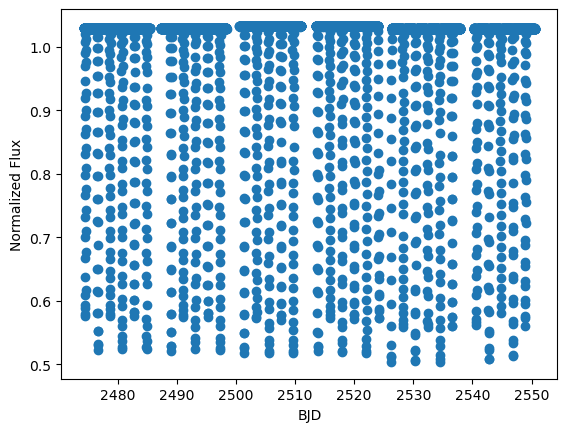

In [81]:
plt.scatter(filttimes,filtfluxes)
plt.xlabel('BJD')
plt.ylabel('Normalized Flux')
plt.show()

In [27]:
Cs=np.fft.rfft(filtfluxes)

In [32]:
C2=abs(Cs)**2

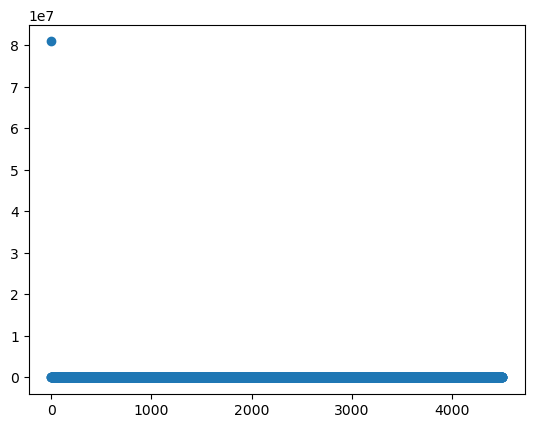

In [47]:
plt.scatter(np.arange(C2.size),C2) #huge zero point

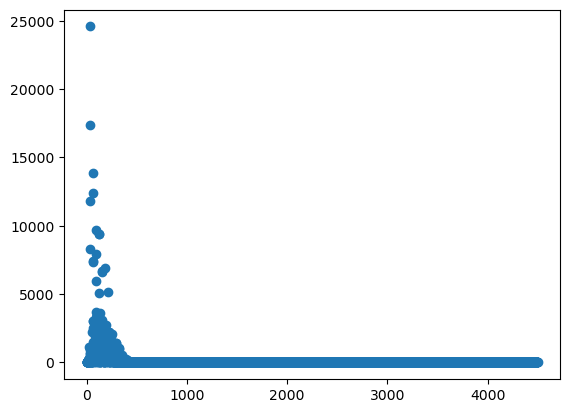

In [49]:
plt.scatter(np.arange(1,C2.size),C2[1:]) #still can't see many details

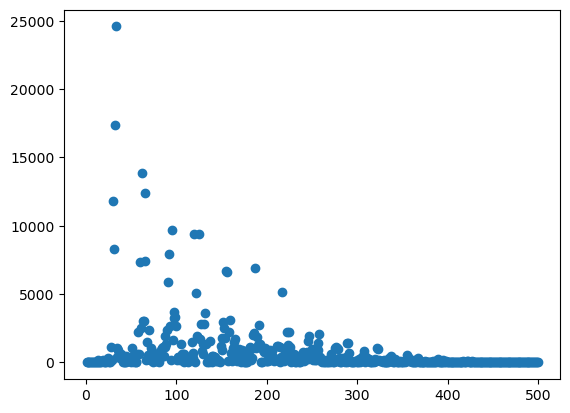

In [59]:
plt.scatter(np.arange(1,500),C2[1:500]) #still can't see many details

In [55]:
maxC2=np.max(C2[1:])
maxk=np.argmax(C2[1:])

In [71]:
freqmask=C2>(0.1*maxC2)

In [73]:
freqmask.sum()

34

In [93]:
Cfilt=np.where(freqmask, Cs, 0)

In [115]:
inverted=np.fft.irfft(Cfilt,n=filttimes.size)

In [117]:
inverted.size

8997

In [119]:
filttimes.size

8997

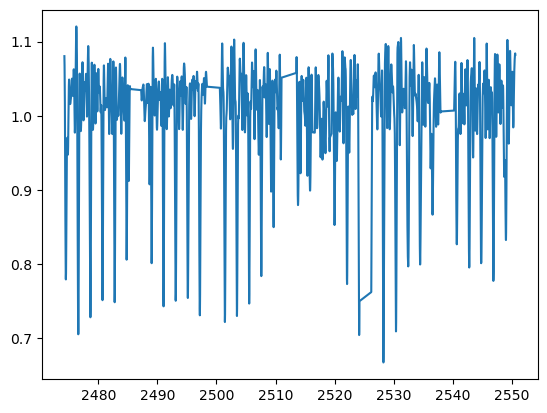

In [123]:
plt.plot(filttimes,inverted)